## Importing the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy.random import normal
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
d = pd.read_csv(r"C:\Users\isham\Downloads\archive (11)\healthcare-dataset-stroke-data.csv")
d

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#Copy original data for preventing data loss

df = d.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Inspection

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.duplicated().sum()

0

## Initial insights from the data

1. Historical data is available 
2. Target Column - stroke
3. Datatype of Target column - Discrete
4. Task - Supervised (Classification)
5. 'Stroke' is detected as an int, not an object
6. In 'Stroke', 0 means does not have a stroke, 1 means has a stroke
7. Similar thing goes with Hypertension and heart disease column also
8. As these columns are in int type hence no need to change it

## What Problem we have ?

1. We have a classfication problem
2. We have to predict on the target variable 'Stroke'
3. We will build model to get the best prediction on the stroke

## Data Cleaning 

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
percentage_missing = (df.isnull().mean() * 100).round(2)
percentage_missing

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64

In [9]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [10]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
### Outliers Detection

def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

print('Age Outliers:',detect_outliers_iqr(df['age']))
print()
print('Average Glucose Level Outliers:',detect_outliers_iqr(df['avg_glucose_level']))
print()
print('BMI Outliers:',detect_outliers_iqr(df['bmi']))

Age Outliers: []

Average Glucose Level Outliers: [169.43, 169.49, 169.67, 169.74, 169.97, 170.05, 170.22, 170.76, 170.88, 170.93, 170.95, 171.23, 172.27, 172.33, 172.86, 173.14, 173.43, 173.9, 173.96, 173.97, 174.12, 174.37, 174.43, 174.54, 175.29, 175.74, 175.92, 176.25, 176.34, 176.38, 176.42, 176.48, 176.71, 176.78, 177.56, 177.91, 178.29, 178.33, 178.76, 178.89, 179.12, 179.14, 179.38, 179.67, 180.45, 180.63, 180.76, 180.8, 180.93, 181.23, 181.23, 181.3, 182.2, 182.22, 182.52, 182.86, 182.9, 182.99, 183.0, 183.1, 183.34, 183.43, 183.45, 183.87, 184.15, 184.25, 184.4, 185.0, 185.17, 185.27, 185.28, 185.31, 185.49, 185.71, 186.17, 186.21, 186.32, 186.4, 186.45, 186.54, 186.95, 187.22, 187.47, 187.52, 187.87, 187.88, 187.99, 188.11, 188.13, 188.69, 189.44, 189.45, 189.49, 189.57, 189.82, 189.84, 189.88, 190.13, 190.14, 190.32, 190.4, 190.67, 190.7, 190.89, 190.92, 191.15, 191.33, 191.47, 191.48, 191.61, 191.66, 191.78, 191.79, 191.82, 191.94, 192.16, 192.37, 192.39, 192.47, 192.5, 19

As these outliers are essential data points and holds a true meaning, hence we cannot remove it but we can use standardization and other data transformation methods for making it in normal distribution

# EDA

## Univariate Analysis

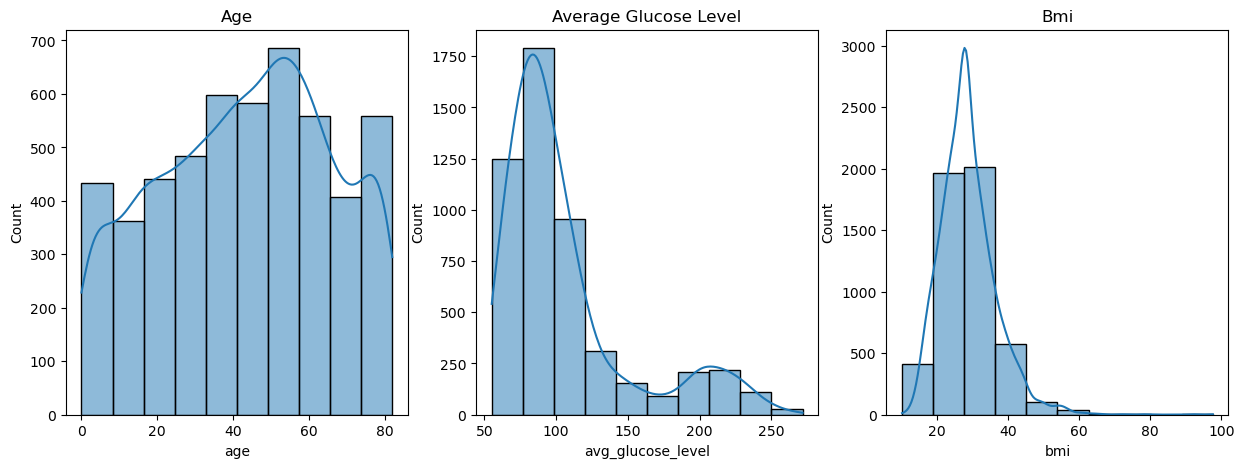

In [12]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.histplot(df['age'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Age')

sns.histplot(df['avg_glucose_level'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Average Glucose Level')

sns.histplot(df['bmi'], bins=10, kde=True, ax=axes[2])
axes[2].set_title('Bmi')

plt.show()

In [13]:
print(df['age'].mean())
print(df['age'].median())

43.226614481409
45.0


In [14]:
print(df['avg_glucose_level'].mean())
print(df['avg_glucose_level'].median())

106.1476771037182
91.88499999999999


In [15]:
print(df['bmi'].mean())
print(df['bmi'].median())

28.862035225048924
28.1


Slightly left skew on the 'age' (mean: 43.22 & median: 45)

Slightly right skew on the 'bmi' (mean: 28.89 & median: 28.10)

And right skew distribution on the 'avg_glucose_level' (mean: 106.14 & median: 91.88)

### Gender 

In [16]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: xlabel='gender'>

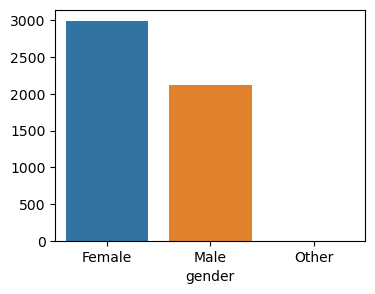

In [17]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['gender'].value_counts().index, y=df['gender'].value_counts().values)

**In the data, we are having 2994 females and 2115 males and 1 other gender people**

### Hypertension

In [18]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

<Axes: xlabel='hypertension'>

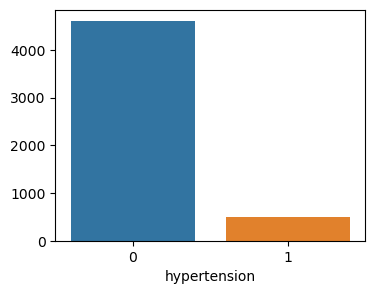

In [19]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['hypertension'].value_counts().index, y=df['hypertension'].value_counts().values)

**We are having 498 people those are having hypertension, which means 9.75% of people is having hypertension in the sample**

### Heart Disease

In [20]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

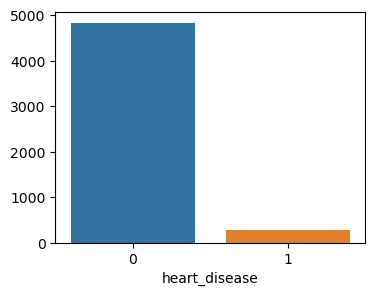

In [21]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['heart_disease'].value_counts().index, y=df['heart_disease'].value_counts().values)
plt.show()

**We are having 276 people those are having heart disease, which means 5.4% of the sample**

### Married

In [22]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

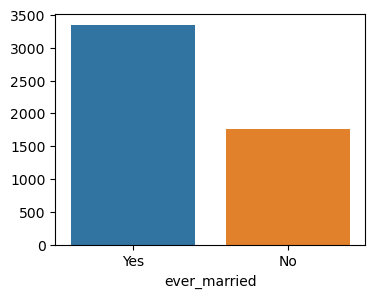

In [23]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['ever_married'].value_counts().index, y=df['ever_married'].value_counts().values)
plt.show()

**3353 (66%) people have been married and 1757(34%) people not married before**

### Work Type

In [24]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

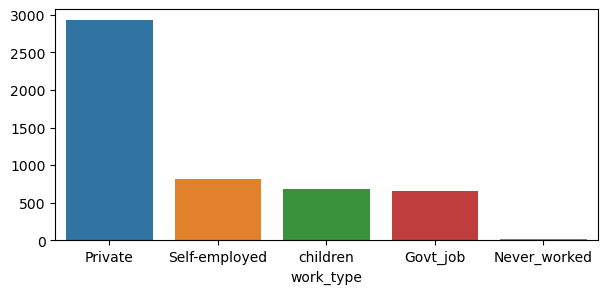

In [25]:
plt.figure(figsize=(7,3))
sns.barplot(x=df['work_type'].value_counts().index, y=df['work_type'].value_counts().values)
plt.show()

**1. 2925 (57%) people work at private sector**

**2. 819 (16%) people are self employed**

**3. 657 (12%) people are government employee**

### Residence Type

In [26]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

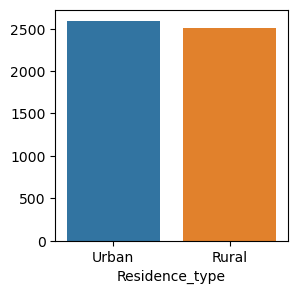

In [27]:
plt.figure(figsize=(3,3))
sns.barplot(x=df['Residence_type'].value_counts().index, y=df['Residence_type'].value_counts().values)
plt.show()

**2596 (51%) people are from urban and 2514 (49%) people are from rural region**

### Smoking 

In [28]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

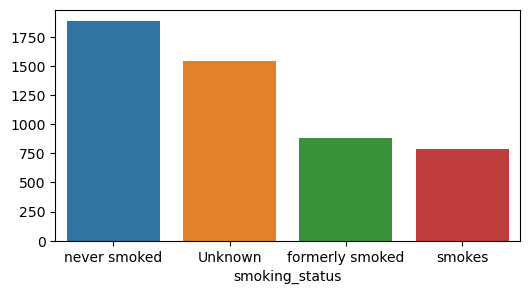

In [29]:
plt.figure(figsize=(6,3))
sns.barplot(x=df['smoking_status'].value_counts().index, y=df['smoking_status'].value_counts().values)
plt.show()

**1. 1892 (37%) people never smoked**

**2. 789 (15%) people smokes**

### Stroke - Target Column

In [30]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

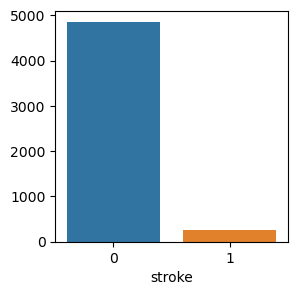

In [31]:
plt.figure(figsize=(3,3))
sns.barplot(x=df['stroke'].value_counts().index, y=df['stroke'].value_counts().values)
plt.show()

<Axes: xlabel='stroke', ylabel='Density'>

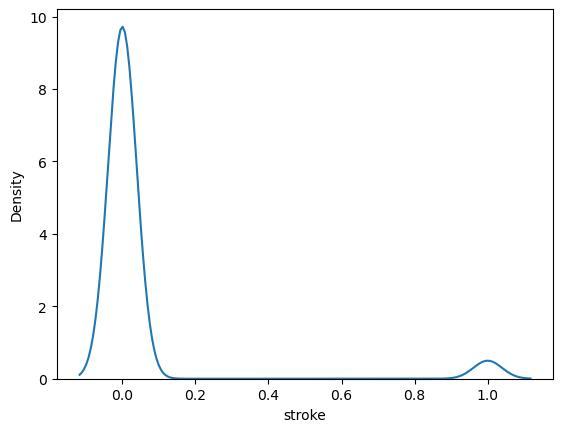

In [32]:
sns.kdeplot(df['stroke'])

**Target column is highly imbalanced as only 249 people having the stroke that is 4.8% of the data. So if we pass this variable then in most of the cases during testing phase we might get No stroke as a result which is baised. And we know that machine learning models do not work well with imbalanced data (skewed data), so to make it normally distributed we need some sort of more synthetic data to balance it.**

## Bivariate Analysis

### Hypertension & Stroke

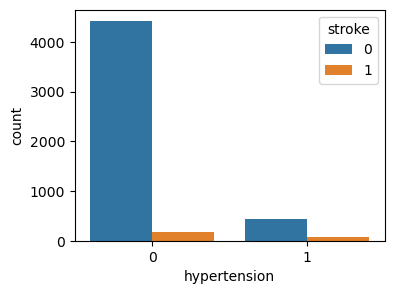

In [33]:
plt.figure(figsize=(4,3))
sns.countplot(x=df['hypertension'], hue=df['stroke'])
plt.show()

In [34]:
print(f'A person with hypertension has probability of {round((df[df["hypertension"]==1]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A person without hypertension has probability of {round((df[df["hypertension"]==0]["stroke"].mean())*100,2)} % for getting a stroke')

A person with hypertension has probability of 13.25 % for getting a stroke
A person without hypertension has probability of 3.97 % for getting a stroke


**1. A stroke probability is quite high in case of a person who is having hypertension as compared to a person not having hypertension.**

**2. 13.25% is the probability that a person with hypertension will get a stroke and 3.97% is the probability that person without hypertension will get a stroke.**

**3. A person with hypertension has approximately 3.3 times the risk of experiencing a stroke compared to someone without hypertension.**

### Heart Disease & Stroke

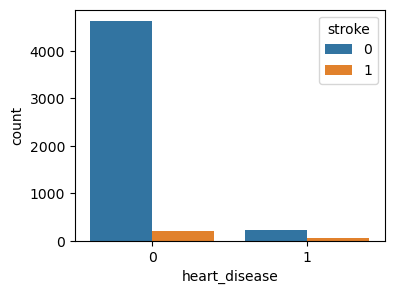

In [35]:
plt.figure(figsize=(4,3))
sns.countplot(x=df['heart_disease'], hue=df['stroke'])
plt.show()

In [36]:
print(f'A person with heart disease has probability of {round((df[df["heart_disease"]==1]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A person without heart disease has probability of {round((df[df["heart_disease"]==0]["stroke"].mean())*100,2)} % for getting a stroke')

A person with heart disease has probability of 17.03 % for getting a stroke
A person without heart disease has probability of 4.18 % for getting a stroke


**1. A stroke probability is quite high in case of a person who is having heart disease as compared to a person not having heart disease.** 

**2. 17.03% is the probability that a person with heart disease will get a stroke and 4.18% is the probability that person without heart disease will get a stroke.**

**3. A person with heart disease has approximately 4.07 times the risk of experiencing a stroke compared to someone without heart disease.**

### Gender & Stroke

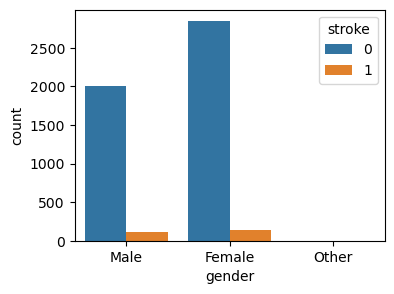

In [37]:
plt.figure(figsize=(4,3))
sns.countplot(x='gender', hue='stroke', data=df)
plt.show()

In [38]:
print(f'A female has probability of {round((df[df["gender"]=="Female"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A male has probability of {round((df[df["gender"]=="Male"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A person from other category has probability of {round((df[df["gender"]=="Other"]["stroke"].mean())*100,2)} % for getting a stroke')

A female has probability of 4.71 % for getting a stroke
A male has probability of 5.11 % for getting a stroke
A person from other category has probability of 0.0 % for getting a stroke


**Male compare to Female are more likely to get a stroke, but difference in their probability is very small.**

### Married & Stroke

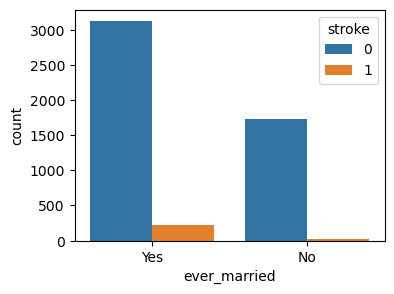

In [39]:
plt.figure(figsize=(4,3))
sns.countplot(x='ever_married', hue='stroke', data=df)
plt.show()

In [40]:
print(f'A married (or married before) person has probability of {round((df[df["ever_married"]=="Yes"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'An unmarried person has probability of {round((df[df["ever_married"]=="No"]["stroke"].mean())*100,2)} % for getting a stroke')

A married (or married before) person has probability of 6.56 % for getting a stroke
An unmarried person has probability of 1.65 % for getting a stroke


**1. A person with a marriage history is having high probability of getting a stroke as compared to a person who never married.**

**2. A married person is having 6.56% of stroke probability whereas an unmarried person's stroke probability is 1.65%.**

**3. A person who is married (or married before) has approximately 4 times the risk of experiencing the stroke as compared to the person who don't have any marriage history.**

### Work Type & Stroke

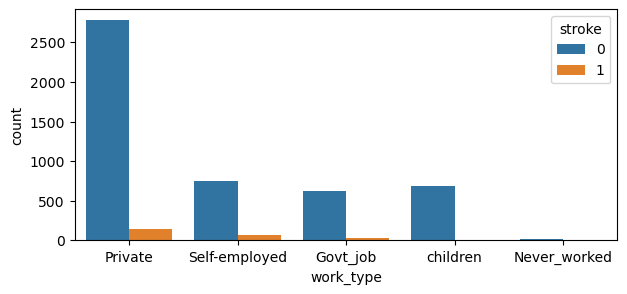

In [41]:
plt.figure(figsize=(7,3))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.show()

In [42]:
print(f'A person working in private sector has probability of {round((df[df["work_type"]=="Private"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A person who is self employed has probability of {round((df[df["work_type"]=="Self-employed"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A person working in governmnt job has probability of {round((df[df["work_type"]=="Govt_job"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A child has probability of {round((df[df["work_type"]=="children"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A person never worked has probability of {round((df[df["work_type"]=="Never_worked"]["stroke"].mean())*100,2)} % for getting a stroke')

A person working in private sector has probability of 5.09 % for getting a stroke
A person who is self employed has probability of 7.94 % for getting a stroke
A person working in governmnt job has probability of 5.02 % for getting a stroke
A child has probability of 0.29 % for getting a stroke
A person never worked has probability of 0.0 % for getting a stroke


**1. Self-employed person has higher probability of getting stroke than other work type**

**2. Person working in private sector and a person working in government sector has same probability of getting a stroke**

### Residence Type & Stroke

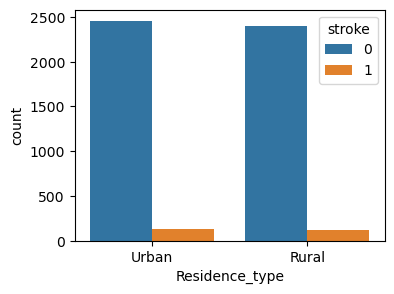

In [43]:
plt.figure(figsize=(4,3))
sns.countplot(x='Residence_type', hue='stroke', data=df)
plt.show()

In [44]:
print(f'A person staying in urban region has probability of {round((df[df["Residence_type"]=="Urban"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A person staying in rural region has probability of {round((df[df["Residence_type"]=="Rural"]["stroke"].mean())*100,2)} % for getting a stroke')

A person staying in urban region has probability of 5.2 % for getting a stroke
A person staying in rural region has probability of 4.53 % for getting a stroke


**1. There is no much difference between the person's residence type.**

**2. Person who lives in urban region has slightly more probability of getting a stroke then a person living in rural area. But the difference is small.**

### Smoking Status & Stroke

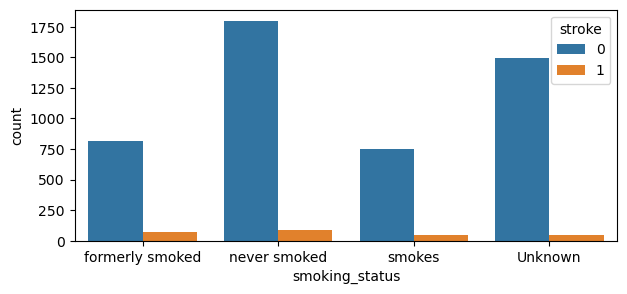

In [45]:
plt.figure(figsize=(7,3))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.show()

In [46]:
print(f'A person who formerly smoked has probability of {round((df[df["smoking_status"]=="formerly smoked"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A person who smokes has probability of {round((df[df["smoking_status"]=="smokes"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A person never smoked has probability of {round((df[df["smoking_status"]=="never smoked"]["stroke"].mean())*100,2)} % for getting a stroke')
print(f'A person whom smoking history is unknown has probability of {round((df[df["smoking_status"]=="Unknown"]["stroke"].mean())*100,2)} % for getting a stroke')

A person who formerly smoked has probability of 7.91 % for getting a stroke
A person who smokes has probability of 5.32 % for getting a stroke
A person never smoked has probability of 4.76 % for getting a stroke
A person whom smoking history is unknown has probability of 3.04 % for getting a stroke


**1. A person who formerly smoked has a probability to get a stroke by 1.66 times more than a person who never smoked.**

**2. A person who smokes has a probability to get a stroke by 1.11 times more than a person who never smoked.**

**3. A person who smokes and a person who never smoked has a very small difference in terms of getting a stroke.**

### Numerical columns and Stroke 

In [47]:
df.groupby('stroke')['age'].mean()

stroke
0    41.971545
1    67.728193
Name: age, dtype: float64

In [48]:
df.groupby('stroke')['avg_glucose_level'].mean()

stroke
0    104.795513
1    132.544739
Name: avg_glucose_level, dtype: float64

In [49]:
df.groupby('stroke')['bmi'].mean()

stroke
0    28.799115
1    30.090361
Name: bmi, dtype: float64

In [50]:
df[['age','avg_glucose_level','bmi','stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.324296,0.245257
avg_glucose_level,0.238171,1.000000,0.166876,0.131945
bmi,0.324296,0.166876,1.000000,0.036110
stroke,0.245257,0.131945,0.036110,1.000000


**1. As the age increases, chance of getting a stroke increase. But a very small positive correlation can be seen between them. Average mean score of getting a stroke is around 67 age.**

**2. There is a significant differences between the mean scores of average glucose level for getting a stroke and very small positive correlation can be seen between glucose level and stroke**

**3. Bmi mean scores are very close to each other.**

## Multivariate Analysis

### Age, Average Glucose level and Stroke 

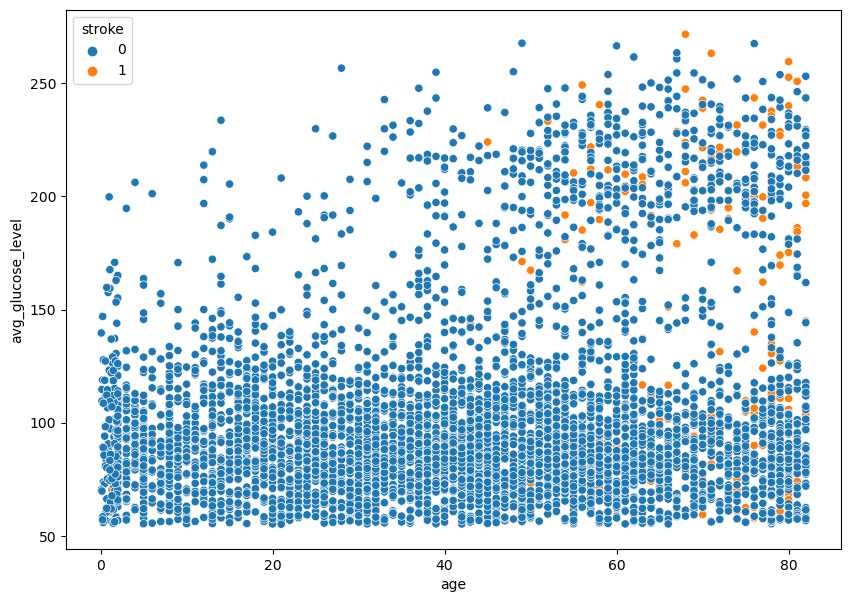

In [51]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='age',y='avg_glucose_level', hue='stroke')
plt.show()

### Age, Bmi and Stroke

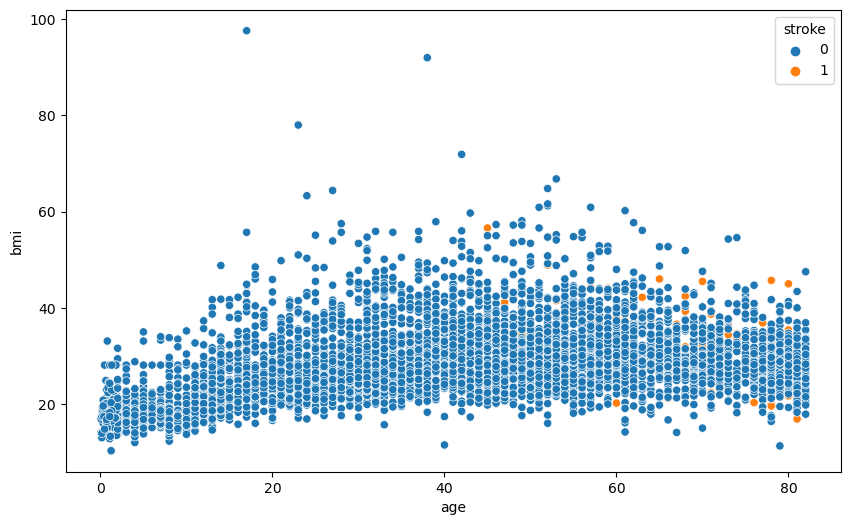

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age',y='bmi', hue='stroke')
plt.show()

### Average Glucose level, Bmi and Stroke

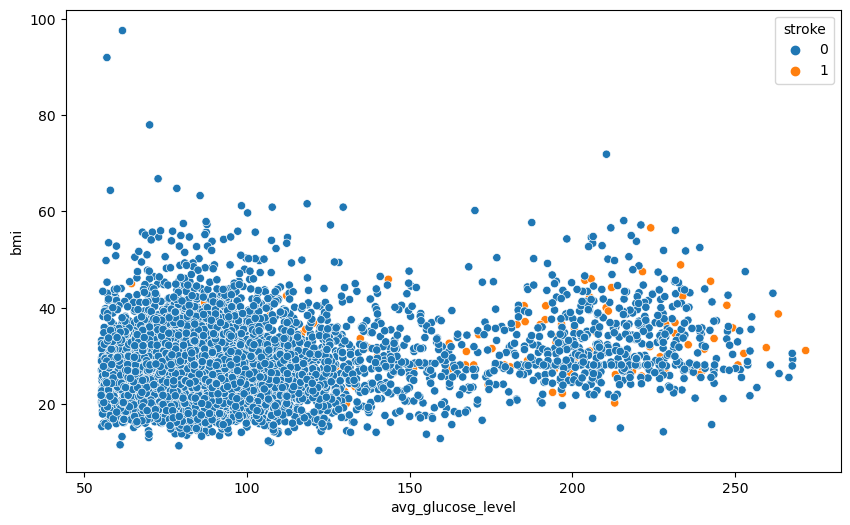

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='avg_glucose_level',y='bmi', hue='stroke')
plt.show()

## Insights

1. Numerical Variables - 
- Age is having very weak positive relation with Target variable (0.25)
- There is a difference between Average Glucose level for a person getting a stroke and a person not getting a stroke. But not a very big difference.
- There is no significant relation between Bmi and Target variable (0.036).

2. Categorical Variables - 
- Males are likely to get stroke more than female but difference is very small.
- **A person with hypertension has approximately 3.3 times the risk of experiencing a stroke compared to someone without hypertension.**
- **A person with heart disease has approximately 4.07 times the risk of experiencing a stroke compared to someone without heart disease.**
- **A person who is married (or married before) has approximately 4 times the risk of experiencing the stroke as compared to the person who don't have any marriage history.**
- Self employed people's are having more probability of getting a stroke then other work type.
- Person who lives in urban region has slightly more probability of getting a stroke then a person living in rural area. But the difference is small.
- A person who smokes and a person who never smoked has a very small difference in terms of getting a stroke.

In [54]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Preprocessing

#### Dropping id column as it is not useful for our machine learning model 

In [55]:
df.drop('id', axis=1, inplace=True)

In [56]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Segregating input columns and target column

In [57]:
y = df['stroke']
x = df.drop('stroke', axis=1)

In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [59]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


## Splitting the data into train and test

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state = 1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4088, 10) (4088,)
(1022, 10) (1022,)


### Adding values which may fall into test data but not available in train data - 'Other' in Gender

In [61]:
x_train['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [62]:
y_train

4152    0
4051    0
5076    0
874     0
3534    0
       ..
2895    0
2763    0
905     0
3980    0
235     1
Name: stroke, Length: 4088, dtype: int64

In [63]:
y_other_value = int(y_train.median())
print(y_other_value)

0


In [64]:
y_train = pd.concat([y_train, pd.Series([y_other_value])])

In [65]:
y_train.shape

(4089,)

In [66]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4152,Male,55.0,0,0,Yes,Self-employed,Rural,73.57,28.0,smokes
4051,Male,55.0,0,0,Yes,Govt_job,Urban,231.15,22.3,never smoked
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.0,never smoked
874,Male,80.0,0,0,Yes,Private,Rural,56.99,26.7,never smoked
3534,Female,61.0,0,0,Yes,Private,Urban,108.18,19.1,never smoked


In [67]:
#Adding 'Other' to the training data so unseen data problem will not arise if 'Other' occurs in test data

a_g = x_train['age'].median()
h_p = int(x_train['hypertension'].median())
h_d = int(x_train['heart_disease'].median())
e_m = x_train['ever_married'].mode().values[0]
w_t = x_train['work_type'].mode().values[0]
r_t = x_train['Residence_type'].mode().values[0]
avg_gl = x_train['avg_glucose_level'].median()
b_mi = x_train['bmi'].median()
s_s = x_train['smoking_status'].mode().values[0]

In [68]:
new_row = pd.DataFrame({'gender':'Other',
                        'age':[a_g],
                        'hypertension':[h_p],
                        'heart_disease':[h_d],
                        'ever_married':[e_m], 
                        'work_type':[w_t], 
                        'Residence_type':[r_t], 
                        'avg_glucose_level':[avg_gl],
                        'bmi':[b_mi],
                        'smoking_status':[s_s]})

x_train = pd.concat([x_train,new_row], ignore_index=True)
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,55.0,0,0,Yes,Self-employed,Rural,73.57,28.0,smokes
1,Male,55.0,0,0,Yes,Govt_job,Urban,231.15,22.3,never smoked
2,Female,34.0,0,0,Yes,Private,Rural,174.37,23.0,never smoked
3,Male,80.0,0,0,Yes,Private,Rural,56.99,26.7,never smoked
4,Female,61.0,0,0,Yes,Private,Urban,108.18,19.1,never smoked


In [69]:
x_train['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [70]:
x_train[x_train['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4088,Other,45.0,0,0,Yes,Private,Urban,91.145,28.1,never smoked


In [71]:
x_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

## Separating Categorical and Numerical columns form x_train data

In [72]:
x_train_cat = x_train.select_dtypes(include='object')
x_train_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Self-employed,Rural,smokes
1,Male,Yes,Govt_job,Urban,never smoked
2,Female,Yes,Private,Rural,never smoked
3,Male,Yes,Private,Rural,never smoked
4,Female,Yes,Private,Urban,never smoked


In [73]:
x_train_num_int = x_train.select_dtypes(include='int64')
x_train_num_int.head() #Since it is already in 0s and 1s, rescaling not required

,hypertension,heart_disease
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [74]:
x_train_num_float = x_train.select_dtypes(include='float64')
x_train_num_float.head()

,age,avg_glucose_level,bmi
0,55.0,73.57,28.0
1,55.0,231.15,22.3
2,34.0,174.37,23.0
3,80.0,56.99,26.7
4,61.0,108.18,19.1


### i) Scalling numerical column

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_num_float_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num_float),
                                   columns = x_train_num_float.columns,
                                   index = x_train_num_float.index)

x_train_num_float_rescaled.head()

,age,avg_glucose_level,bmi
0,0.526022,-0.708688,-0.115843
1,0.526022,2.770324,-0.858192
2,-0.402714,1.516749,-0.767026
3,1.631660,-1.074737,-0.285151
4,0.791375,0.055423,-1.274948


### Concatenating int and float column together

In [76]:
x_train_num_rescaled = pd.concat([x_train_num_float_rescaled,x_train_num_int], axis=1)
x_train_num_rescaled.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease
0,0.526022,-0.708688,-0.115843,0,0
1,0.526022,2.770324,-0.858192,0,0
2,-0.402714,1.516749,-0.767026,0,0
3,1.631660,-1.074737,-0.285151,0,0
4,0.791375,0.055423,-1.274948,0,0


### ii) Applying OneHotEncoder to Categorical column

In [77]:
x_train_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Self-employed,Rural,smokes
1,Male,Yes,Govt_job,Urban,never smoked
2,Female,Yes,Private,Rural,never smoked
3,Male,Yes,Private,Rural,never smoked
4,Female,Yes,Private,Urban,never smoked


In [78]:
x_train_cat['gender'].value_counts(normalize=True)

gender
Female    0.581805
Male      0.417951
Other     0.000245
Name: proportion, dtype: float64

In [79]:
x_train_cat['ever_married'].value_counts(normalize=True)

ever_married
Yes    0.656884
No     0.343116
Name: proportion, dtype: float64

In [80]:
x_train_cat['work_type'].value_counts(normalize=True)

work_type
Private          0.569088
Self-employed    0.161164
children         0.137686
Govt_job         0.127415
Never_worked     0.004647
Name: proportion, dtype: float64

In [81]:
x_train_cat['Residence_type'].value_counts(normalize=True)

Residence_type
Urban    0.508437
Rural    0.491563
Name: proportion, dtype: float64

In [82]:
x_train_cat['smoking_status'].value_counts(normalize=True)

smoking_status
never smoked       0.366349
Unknown            0.305943
formerly smoked    0.174126
smokes             0.153583
Name: proportion, dtype: float64

In [83]:
x_train_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Self-employed,Rural,smokes
1,Male,Yes,Govt_job,Urban,never smoked
2,Female,Yes,Private,Rural,never smoked
3,Male,Yes,Private,Rural,never smoked
4,Female,Yes,Private,Urban,never smoked


In [84]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',min_frequency=500, sparse_output=False)

x_train_cat_ohe = pd.DataFrame(encoder.fit_transform(x_train_cat),
                              columns = encoder.get_feature_names_out(x_train_cat.columns),
                              index = x_train_cat.index)


x_train_cat_ohe.head()

,gender_Male,gender_infrequent_sklearn,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,work_type_infrequent_sklearn,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [85]:
encoder.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [86]:
encoder.infrequent_categories_

[array(['Other'], dtype=object),
 None,
 array(['Never_worked'], dtype=object),
 None,
 None]

## Concatenating Encoded categorical and scaled numerical column

In [87]:
x_train_num_rescaled.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease
0,0.526022,-0.708688,-0.115843,0,0
1,0.526022,2.770324,-0.858192,0,0
2,-0.402714,1.516749,-0.767026,0,0
3,1.631660,-1.074737,-0.285151,0,0
4,0.791375,0.055423,-1.274948,0,0


In [88]:
x_train_cat_ohe.head()

,gender_Male,gender_infrequent_sklearn,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,work_type_infrequent_sklearn,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [89]:
x_train_transformed = pd.concat([x_train_num_rescaled,x_train_cat_ohe], axis=1)
x_train_transformed.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,gender_Male,gender_infrequent_sklearn,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,work_type_infrequent_sklearn,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.526022,-0.708688,-0.115843,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.526022,2.770324,-0.858192,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.402714,1.516749,-0.767026,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.631660,-1.074737,-0.285151,0,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.791375,0.055423,-1.274948,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Processing x-test data

In [90]:
x_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4673,Female,42.0,0,0,Yes,Govt_job,Rural,112.98,37.2,formerly smoked
3232,Female,78.0,0,0,Yes,Private,Urban,78.29,30.1,formerly smoked
3694,Male,28.0,0,0,No,Private,Urban,73.27,25.4,smokes
1070,Female,81.0,0,0,Yes,Self-employed,Rural,246.34,21.1,never smoked
4163,Female,52.0,0,0,Yes,Private,Rural,97.05,28.0,Unknown


## Separating Categorical and Numerical columns form x_test data

In [91]:
x_test_cat = x_test.select_dtypes(include='object')
x_test_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
4673,Female,Yes,Govt_job,Rural,formerly smoked
3232,Female,Yes,Private,Urban,formerly smoked
3694,Male,No,Private,Urban,smokes
1070,Female,Yes,Self-employed,Rural,never smoked
4163,Female,Yes,Private,Rural,Unknown


In [92]:
x_test_num_int = x_test.select_dtypes(include='int64')
x_test_num_int.head()

,hypertension,heart_disease
4673,0,0
3232,0,0
3694,0,0
1070,0,0
4163,0,0


In [93]:
x_test_num_float = x_test.select_dtypes(include='float64')
x_test_num_float.head()

,age,avg_glucose_level,bmi
4673,42.0,112.98,37.2
3232,78.0,78.29,30.1
3694,28.0,73.27,25.4
1070,81.0,246.34,21.1
4163,52.0,97.05,28.0


### i) Rescaling numerical features

In [94]:
x_test_num_float_rescaled = pd.DataFrame(scaler.transform(x_test_num_float),
                                        columns = x_test_num_float.columns,
                                        index = x_test_num_float.index)

x_test_num_float_rescaled.head()

,age,avg_glucose_level,bmi
4673,-0.048910,0.161396,1.082333
3232,1.543209,-0.604481,0.157653
3694,-0.668067,-0.715311,-0.454458
1070,1.675885,3.105685,-1.014475
4163,0.393345,-0.190302,-0.115843


### Concatenating int and float column together

In [95]:
x_test_num_rescaled = pd.concat([x_test_num_float_rescaled, x_test_num_int], axis=1)
x_test_num_rescaled.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease
4673,-0.048910,0.161396,1.082333,0,0
3232,1.543209,-0.604481,0.157653,0,0
3694,-0.668067,-0.715311,-0.454458,0,0
1070,1.675885,3.105685,-1.014475,0,0
4163,0.393345,-0.190302,-0.115843,0,0


### ii) Applying OneHotEncoder to Categorical column

In [96]:
x_test_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
4673,Female,Yes,Govt_job,Rural,formerly smoked
3232,Female,Yes,Private,Urban,formerly smoked
3694,Male,No,Private,Urban,smokes
1070,Female,Yes,Self-employed,Rural,never smoked
4163,Female,Yes,Private,Rural,Unknown


In [97]:
#All the featues are nominal, hence applying OneHotEncoding

In [98]:
x_test_cat['gender'].value_counts()

gender
Female    615
Male      406
Other       1
Name: count, dtype: int64

In [99]:
x_test_cat_ohe = pd.DataFrame(encoder.transform(x_test_cat),
                             columns = encoder.get_feature_names_out(x_test_cat.columns),
                             index = x_test_cat.index)

x_test_cat_ohe.head()

,gender_Male,gender_infrequent_sklearn,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,work_type_infrequent_sklearn,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4673,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3232,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3694,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1070,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4163,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Concatenating Encoded categorical and scaled numerical column

In [100]:
x_test_cat_ohe.head()

,gender_Male,gender_infrequent_sklearn,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,work_type_infrequent_sklearn,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4673,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3232,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3694,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1070,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4163,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
x_test_num_rescaled.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease
4673,-0.048910,0.161396,1.082333,0,0
3232,1.543209,-0.604481,0.157653,0,0
3694,-0.668067,-0.715311,-0.454458,0,0
1070,1.675885,3.105685,-1.014475,0,0
4163,0.393345,-0.190302,-0.115843,0,0


In [102]:
x_test_transformed = pd.concat([x_test_num_rescaled,x_test_cat_ohe], axis=1)
x_test_transformed.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,gender_Male,gender_infrequent_sklearn,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,work_type_infrequent_sklearn,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4673,-0.048910,0.161396,1.082333,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3232,1.543209,-0.604481,0.157653,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3694,-0.668067,-0.715311,-0.454458,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1070,1.675885,3.105685,-1.014475,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4163,0.393345,-0.190302,-0.115843,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
x_train_transformed.shape

(4089, 16)

In [104]:
x_test_transformed.shape

(1022, 16)

# Model Building

## Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)

#Evaluation

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9412915851272016

## KNN Classifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9383561643835616

## Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9060665362035225

## Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.18590998043052837

## Support Vector Machine

In [109]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9412915851272016